# Explorative Data Analysis - Patients

In this notebook you find the explorative data anaylsis for the label data of patients.
There is also diagnostic data of the patients, data of the used MRI machines and for some cases (like external admissions) there ist lab data available.
The aggregations are always limited to one individual patients.


## Imports and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default plt figsize to (12,6)
plt.rcParams["figure.figsize"] = (12,6)
pd.set_option('display.colheader_justify', 'center')


In [2]:
# runs the clean and preprocessing notebook
%run "clean_preprocessing.ipynb"

Start Clean and Preprocessing patients-data
End Clean and Preprocessing patient data
Start Clean and Preprocessing mri data
69 Cases were deleted, because they were same-day duplicates.
End Clean and Preprocessing mri data
Start Clean and Preprocessing lab-data
Sparsity of labordata: 0.315 % (nur von Fällen mit Laborwerten)
Von 509 Fällen gibt es keine Laborwerte.
End Clean and Preprocessing labor data


In [3]:
# runs the imputation notebook
%run "imputation.ipynb"

Start Imputation Lab data
248
133
126
38
59
464
23
Sparsity of lab values in percent is:
Date_Case         0.0
ID_MRI_Machine    0.0
MRI_Case_ID       0.0
COR60             0.0
FSH               0.0
FT4               0.0
IGF1              0.0
dtype: float64
End Imputation Lab data


In [4]:
# runs the data_partitioning notebook
%run "data_partitioning.ipynb"

Start Data Partitioning
Total Patients Train set: 292
Total Patients Test set: 73
Label Distribution relative Difference between Train- and Testset:
 ± 0.342 %
Total Dataframe Train rows: 401
Total Dataframe Test rows: 107
Label Distribution relative Difference between Train- and Testset:
 ± 5.433 %
Total Dataframe Fold 1 rows: 81
Total Dataframe Fold 2 rows: 80
Total Dataframe Fold 3 rows: 80
Total Dataframe Fold 4 rows: 80
Total Dataframe Fold 5 rows: 80
Label Distribution relative Difference between Fold 0 vs. Fold 1:
 ± 0.02 %
Label Distribution relative Difference between Fold 0 vs. Fold 2:
 ± 0.02 %
Label Distribution relative Difference between Fold 0 vs. Fold 3:
 ± 0.005 %
Label Distribution relative Difference between Fold 0 vs. Fold 4:
 ± 0.005 %
Label Distribution relative Difference between Fold 1 vs. Fold 2:
 ± 0.0 %
Label Distribution relative Difference between Fold 1 vs. Fold 3:
 ± 0.025 %
Label Distribution relative Difference between Fold 1 vs. Fold 4:
 ± 0.025 %
Labe

In [5]:
# read train data set
df = pd.read_csv(r'../data/train_data.csv')

In [6]:
# make datetime values
df["Date_Case"] = pd.to_datetime(df["Date_Case"])
df["Entry_date"] = pd.to_datetime(df["Entry_date"])
df["Operation_date"] = pd.to_datetime(df["Operation_date"])
# set category data type in pandas, check datatypes
df['ID_MRI_Machine'] = df['ID_MRI_Machine'].astype('category')
df['Adenoma_size'] = df['Adenoma_size'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Patient_gender'] = df['Patient_gender'].astype('category')

## Dataframe Summary

In [7]:
df.head()

,Patient_ID,Category,Case_ID,Date_Case,ID_MRI_Machine,MRI_Case_ID,COR60,FSH,FT4,IGF1,...,Diagnosis_infraundsuprasellär,Diagnosis_supprimiertesprolaktin,Diagnosis_teilsinaktiv,Diagnosis_lhundfshsezernierndesadenom,Diagnosis_emptysella,Diagnosis_normalbefund,Diagnosis_acth,Operation_date,Entry_date,fold
0,300158347,non-prolaktinom,40785490,2020-06-16 11:08:00,MRI3,8133267,500.0,4.8000,11.80,2.900,...,0,0,0,0,0,0,0,NaT,2019-08-28,0
1,586746,non-prolaktinom,41014240,2020-11-12 09:20:00,MRI3,8230344,500.0,0.2000,9.61,12.800,...,0,0,0,0,0,0,0,2010-04-19,2010-04-01,0
2,351066,non-prolaktinom,40714914,2019-06-26 08:15:00,MRI4,7944104,500.0,16.1224,18.20,8.820,...,0,0,0,0,0,0,0,2003-02-01,2002-01-01,1
3,300152091,non-prolaktinom,40729953,2019-11-16 10:44:00,MRI3,8001528,500.0,2.3000,11.20,25.500,...,0,0,0,0,0,0,1,2010-02-09,2010-01-01,4
4,542706,non-prolaktinom,40500610,2018-08-28 13:04:00,MRI4,7726236,630.0,0.6000,13.30,16.113,...,0,0,0,0,0,0,0,2008-12-15,NaT,3


In [8]:
df.tail()

,Patient_ID,Category,Case_ID,Date_Case,ID_MRI_Machine,MRI_Case_ID,COR60,FSH,FT4,IGF1,...,Diagnosis_infraundsuprasellär,Diagnosis_supprimiertesprolaktin,Diagnosis_teilsinaktiv,Diagnosis_lhundfshsezernierndesadenom,Diagnosis_emptysella,Diagnosis_normalbefund,Diagnosis_acth,Operation_date,Entry_date,fold
396,300089791,non-prolaktinom,40410804,2018-06-12 08:03:00,MRI3,7704306,500.0,1.20,12.30,9.45,...,0,0,0,0,0,0,0,2018-02-26,2017-12-01,3
397,300089791,non-prolaktinom,40846909,2019-12-02 11:25:00,MRI1,7984987,701.0,2.10,9.44,10.40,...,0,0,0,0,0,0,0,2018-02-26,2017-12-01,1
398,300089791,non-prolaktinom,41412242,2022-01-18 15:26:00,MRI1,8569507,701.0,3.09,13.40,10.70,...,0,0,0,0,0,0,0,2018-02-26,2017-12-01,4
399,569633,prolaktinom,41478937,2022-02-17 14:50:00,MRI1,8363974,500.0,4.80,11.70,11.40,...,0,0,0,0,0,0,0,NaT,2021-01-01,3
400,569633,prolaktinom,41683073,2022-12-19 12:37:00,MRI4,8841316,500.0,4.80,11.70,11.40,...,0,0,0,0,0,0,0,NaT,2021-01-01,4


In [9]:
print("Total Dataframe rows:", len(df))
print("Total Dataframe columns:", len(df.columns))

Total Dataframe rows: 401
Total Dataframe columns: 69


## Distribution Analysis
we will take a look at the distributions of the variables and check for outliers as well.

### Data of MRI
First we will take a look at the distribution of the data for the MRI which were done. 

In [106]:
column = 'Date_Case'
print("Range of Case dates:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Case dates: 15.08.2016 to 11.05.2023
Missing values: 0


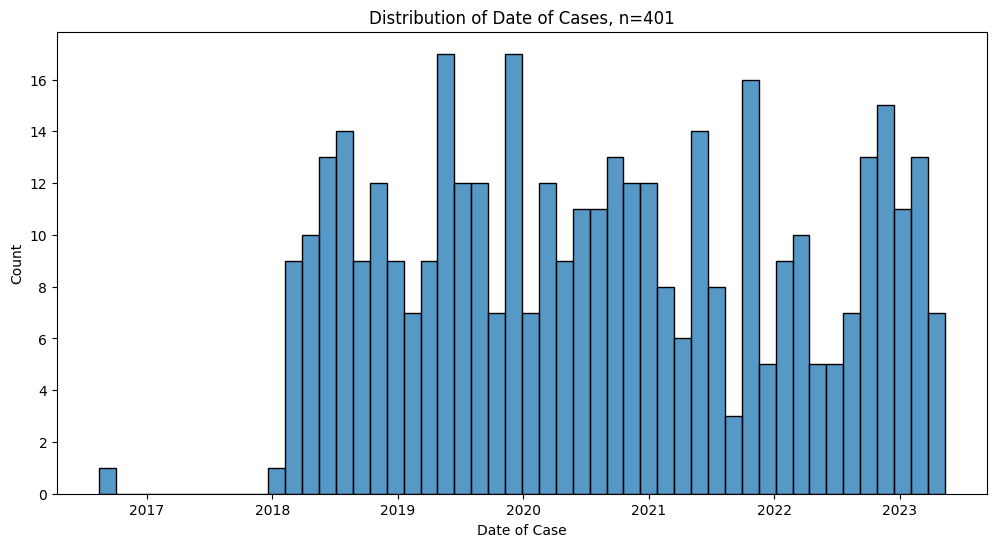

In [107]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of Date of Cases, n={len(df[column])}")
plt.xlabel('Date of Case')
plt.show()

In [12]:
# TODO Der von 2016 ist speziell, wir sollten keine Daten haben, von dieser Zeit (von Jahre zurück ist 2018) und Operationsdatum von 2010?
df.iloc[df["Date_Case"].argmin()]

Patient_ID                             595661
Category                          prolaktinom
Case_ID                              40076776
Date_Case                 2016-08-15 11:15:00
ID_MRI_Machine                           MRI3
                                 ...         
Diagnosis_normalbefund                      0
Diagnosis_acth                              0
Operation_date            2010-07-28 00:00:00
Entry_date                2010-07-01 00:00:00
fold                                        1
Name: 190, Length: 69, dtype: object

### Data of MRI Machines

We will analyse the distribution of the used MRI Machines. As there setup  is the same they will not have a big influence in the classification.


In [109]:
column= 'ID_MRI_Machine'
print("Unique MRI Machines:", df[column].unique())
print("Missing values:", sum(df[column].isna()))

Unique MRI Machines: ['MRI3', 'MRI4', 'MRI1', 'MRI2', 'MRSZ']
Categories (5, object): ['MRI1', 'MRI2', 'MRI3', 'MRI4', 'MRSZ']
Missing values: 0


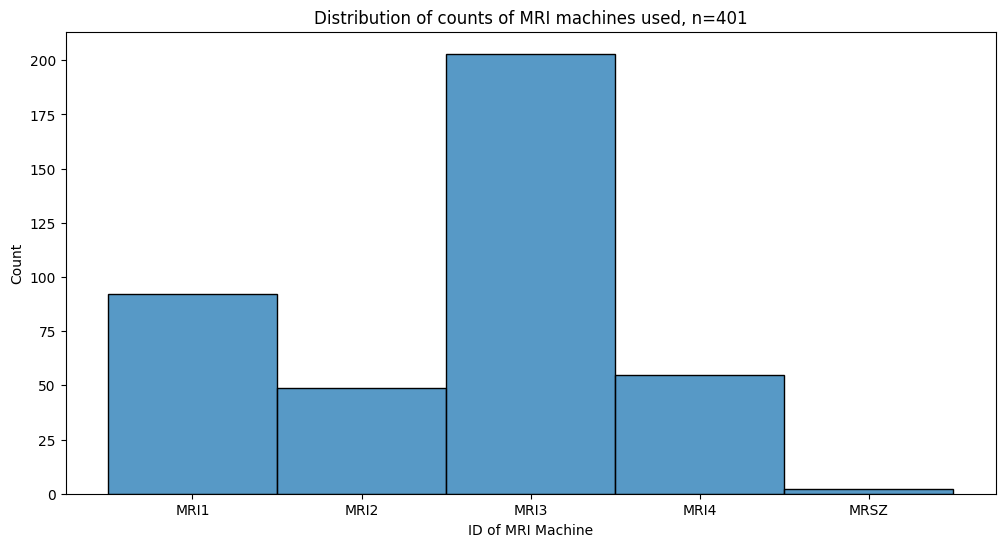

In [110]:
sns.histplot(df[column])
plt.title(f"Distribution of counts of MRI machines used, n={len(df[column])}")
plt.xlabel('ID of MRI Machine')
plt.show()

### Data Features (screening data)

#### Adenoma Size
The column for the 'Adenoma_size' describes if an Adenoma was labeled as micro or macro.
Micro is defined as <10mm and a macro is defined as >= 10 mm in size.

In [111]:
column= 'Adenoma_size'
print(f"Summary Statistics:\n{df[column].describe()}")
print(f"Percentage Distribution:\n{df[column].value_counts(normalize=True) * 100}")
print(f"Missing values Adenoma size:{sum(df[column].isna())}")

Summary Statistics:
count       388
unique        4
top       makro
freq        256
Name: Adenoma_size, dtype: object
Percentage Distribution:
Adenoma_size
makro     65.979381
mikro     29.896907
giant      3.608247
normal     0.515464
Name: proportion, dtype: float64
Missing values Adenoma size:13


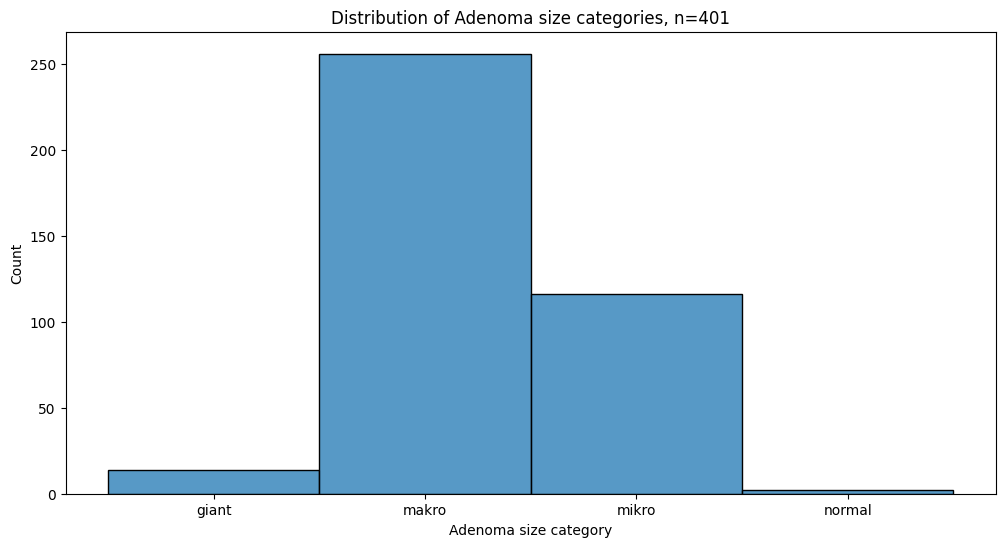

In [112]:
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma size categories, n={len(df[column])}")
plt.xlabel('Adenoma size category')
plt.show()

#### Pre Operation hormonal disfunctions
The column for the 'Ausfälle prä' describes if a patient was experiencing an under- or an overproduction of a type of hormone (produced by the pituitary gland) before an operation.
Values which indicate a prolaktinoma are an overproduction of prolactin (hyperprolaktin).


In [113]:
# define all "pre op" columns
pre_op_columns = [col for col in df.columns if "Pre_" in col]

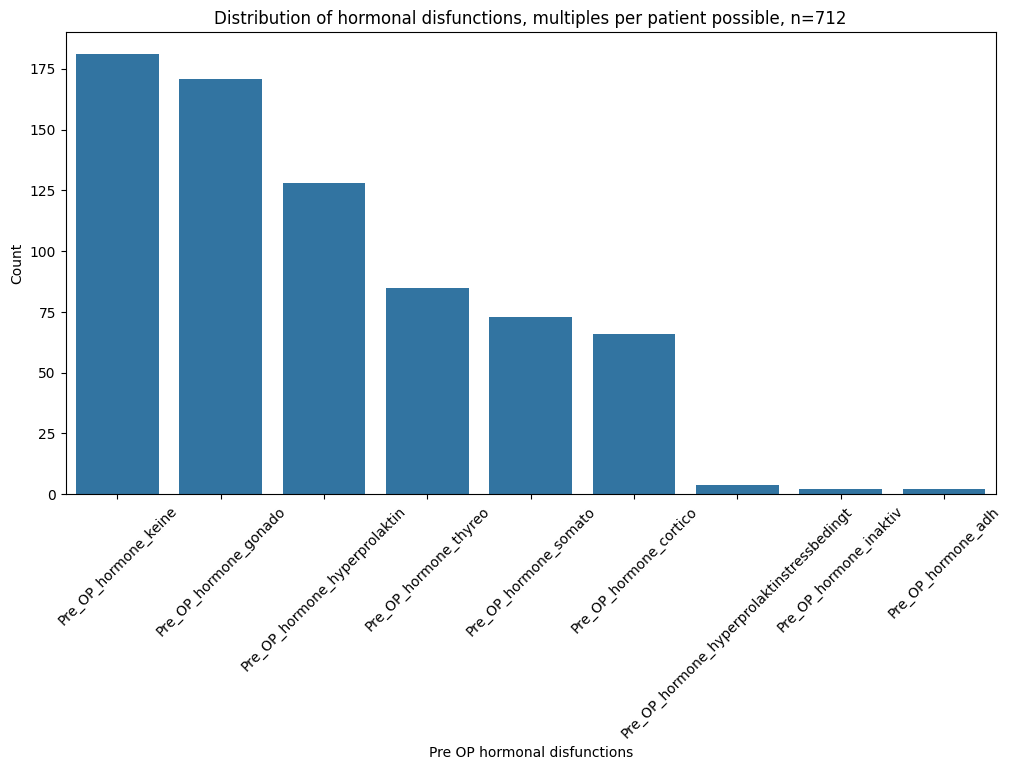

In [118]:
# summarise and sort the pre op column values
summary=df[pre_op_columns].sum().sort_values(ascending=False)
sns.barplot(x=summary.index, y=summary.values)
plt.title(f"Distribution of hormonal disfunctions, multiples per patient possible, n={sum(summary)}")
plt.xlabel("Pre OP hormonal disfunctions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

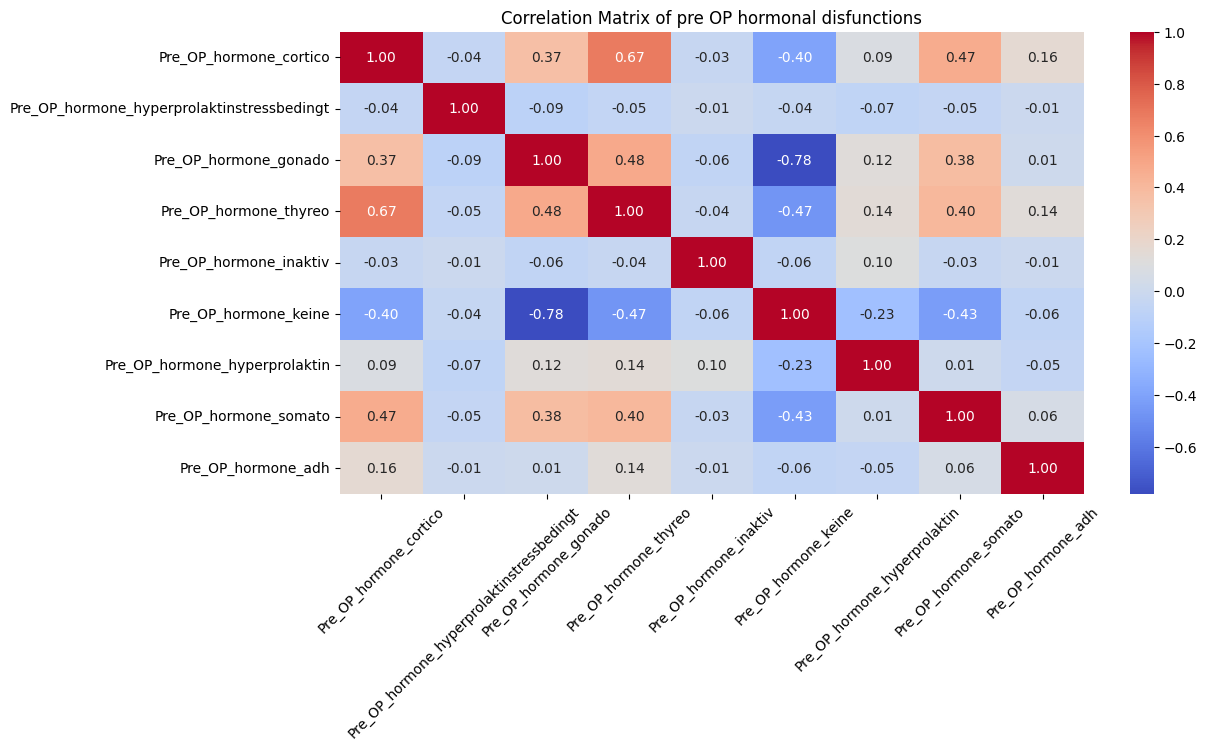

In [19]:
# correlate all pre op columns to each other
correlation_matrix = df[pre_op_columns].corr()
# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of pre OP hormonal disfunctions")
plt.xticks(rotation=45)
plt.show()

#### Date of Entry and Operation
The columns for the 'Eintrittsdatum' and 'Operationdatum' describe when a patient entered the hospital and also when the operation took place.
The difference between these values can show the significance or the extraordinary need for an operation.

In [119]:
column = 'Entry_date'
print("Range of Entry date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Entry date: 01.01.1987 to 01.09.2023
Missing values: 3


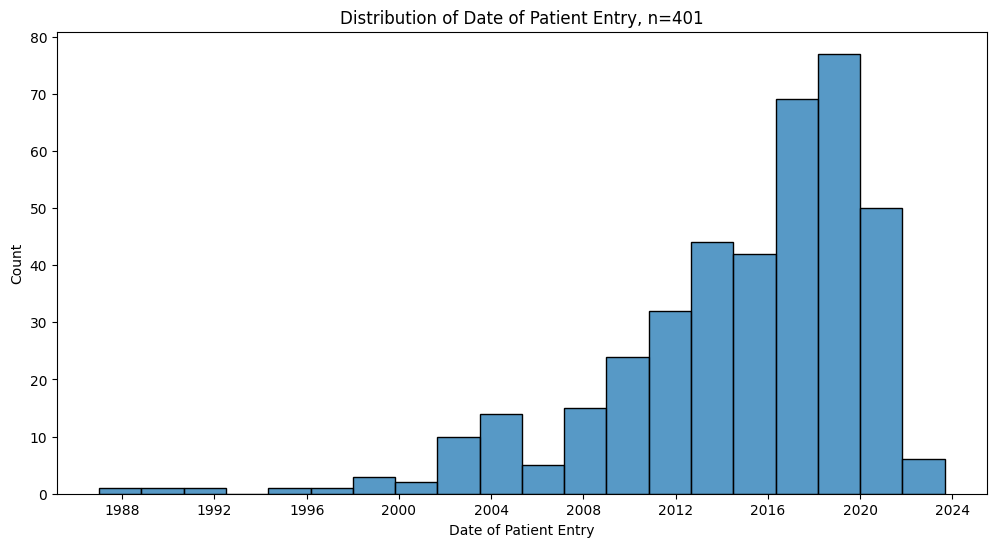

In [120]:
sns.histplot(df[column],bins=20)
plt.title(f"Distribution of Date of Patient Entry, n={len(df[column])}")
plt.xlabel('Date of Patient Entry')
plt.show()

In [121]:
column = 'Operation_date'
print("Range of Operation date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Operation date: 01.01.1989 to 14.09.2023
Missing values: 142


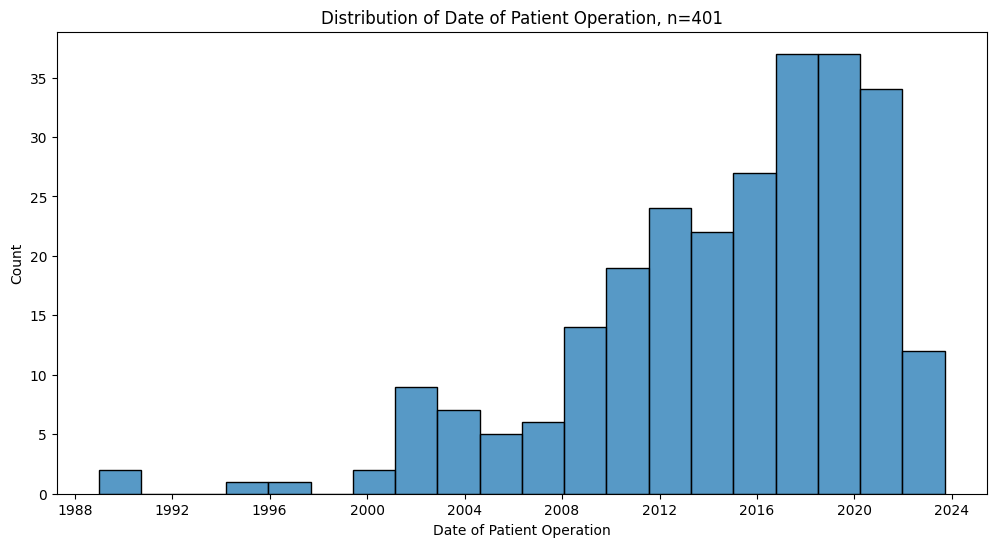

In [124]:
sns.histplot(df[column],bins=20)
plt.title(f"Distribution of Date of Patient Operation, n={len(df[column])}")
plt.xlabel('Date of Patient Operation')
plt.show()

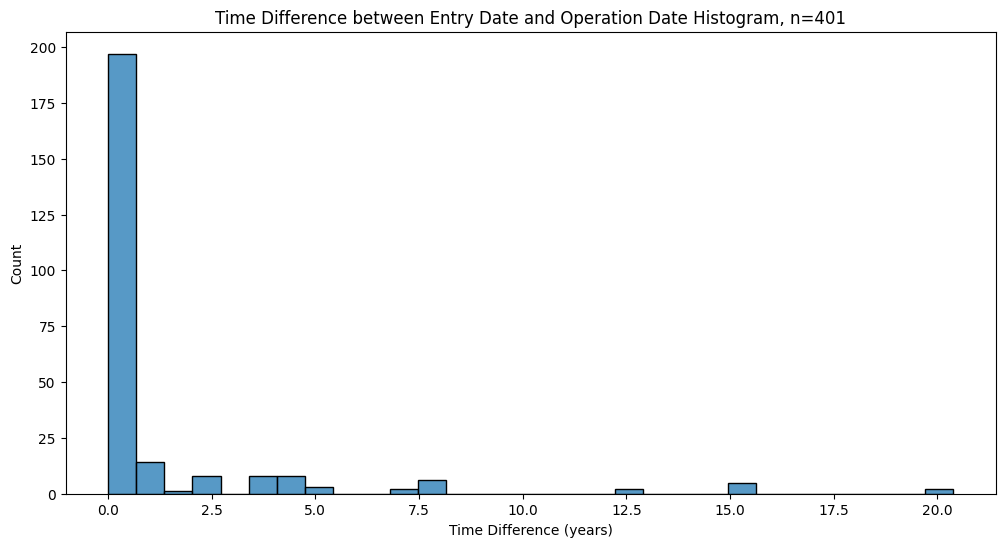

In [125]:
# calculate time difference in years between operation and entry date
df['EDDate_OPDate_Difference'] = (df['Operation_date'] - df['Entry_date']).dt.days /365
# Create a histogram to visualize the time differences
sns.histplot(df['EDDate_OPDate_Difference'], bins=30)
plt.title(f"Time Difference between Entry Date and Operation Date Histogram, n={len(df[column])}")
plt.xlabel("Time Difference (years)")
plt.ylabel("Count")
plt.show()

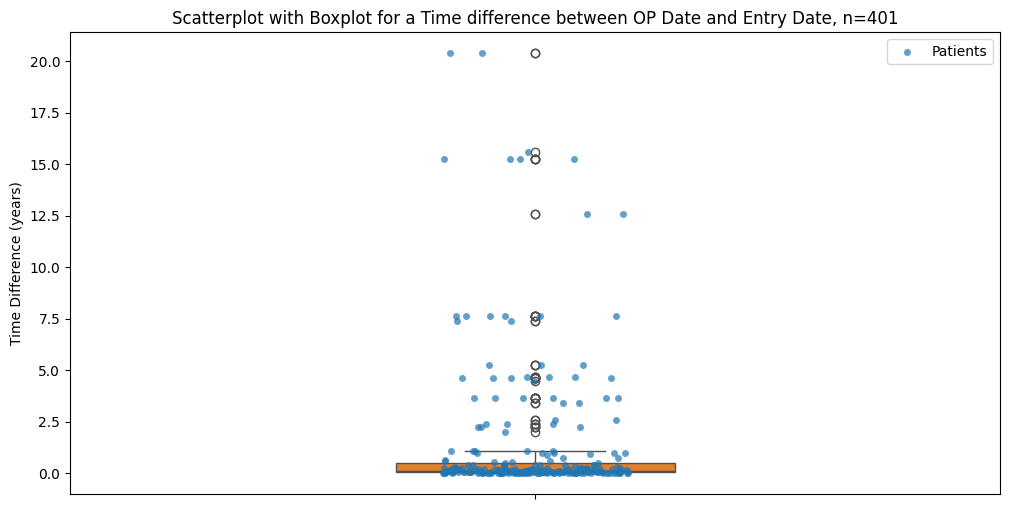

In [126]:
sns.stripplot(y=df['EDDate_OPDate_Difference'], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df['EDDate_OPDate_Difference'], width=0.3)
plt.title(f"Scatterplot with Boxplot for a Time difference between OP Date and Entry Date, n={len(df[column])}")
plt.ylabel("Time Difference (years)")
plt.show()

#### Patient gender
The Patients gender is in the data set. It might be needed to impute certain missing values of hormone levels.

In [127]:
column = 'Patient_gender'
print("Summary Statistics Patient Gender:\n", df[column].describe())
print("Missing values:", sum(df[column].isna()))

Summary Statistics Patient Gender:
 count      401
unique       2
top       male
freq       204
Name: Patient_gender, dtype: object
Missing values: 0


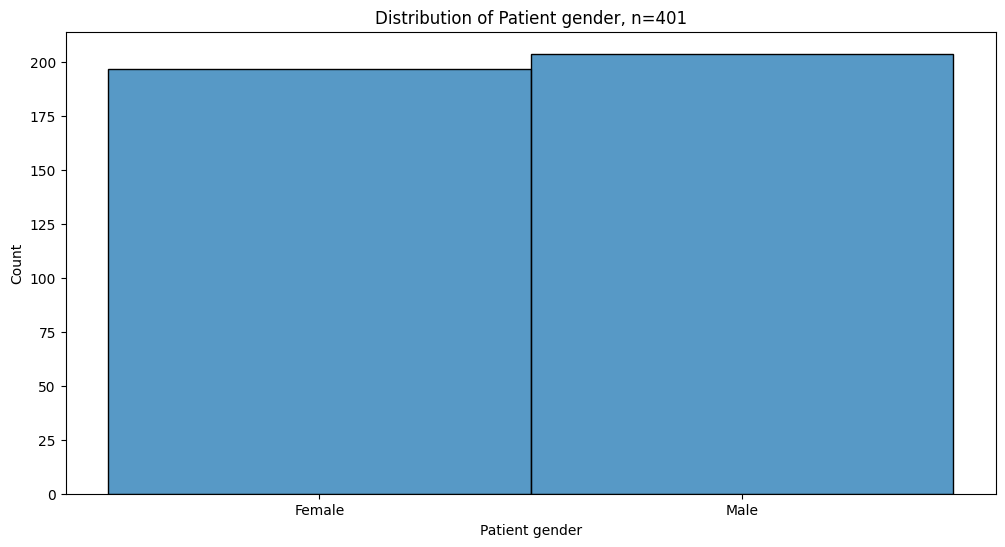

In [128]:
sns.histplot(df[column],bins=30)
plt.title(f"Distribution of Patient gender, n={len(df[column])}")
plt.xlabel('Patient gender')
plt.xticks([0, 1], ['Female', 'Male'])  # Replace 0 and 1 with Female and Male
plt.show()

#### Patient Age
The Patients age is also the data set. It might be needed to impute certain missing values of hormone levels.


In [129]:
column = 'Patient_age'
print("Range of ages:", df[column].min(), "to", df[column].max())
print("Mean Patient Age:", df[column].mean())
print("Median Patient Age:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of ages: 17 to 86
Mean Patient Age: 55.251870324189525
Median Patient Age: 58.0
Missing values: 0


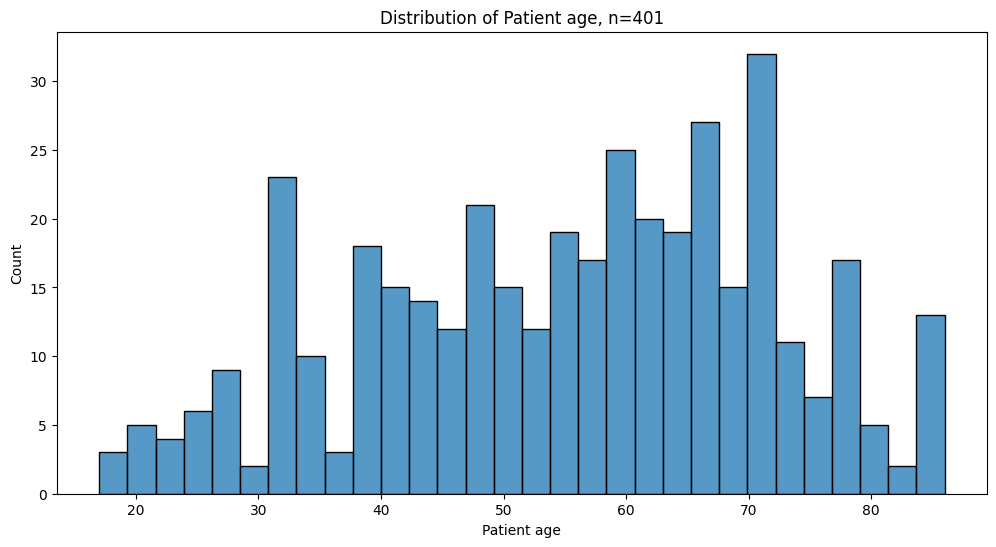

In [130]:
sns.histplot(df[column],bins=30)
plt.title(f"Distribution of Patient age, n={len(df[column])}")
plt.xlabel('Patient age')
plt.show()

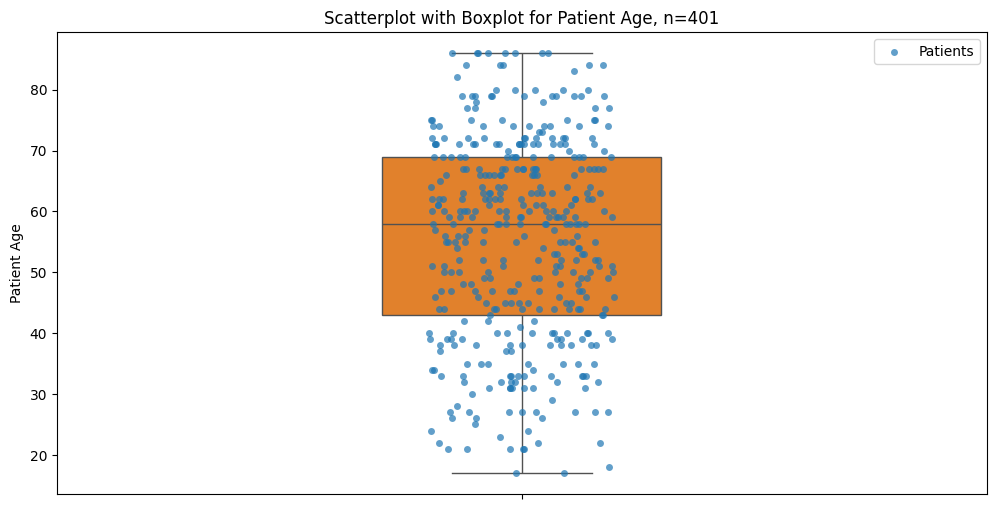

In [131]:
sns.stripplot(y=df[column], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df[column], width=0.3)
plt.title(f"Scatterplot with Boxplot for Patient Age, n={len(df[column])}")
plt.ylabel("Patient Age")
plt.legend()
plt.show()

### Data Laboratory Data (hormonal data)

Some Patients are missing lab values because they were transferred from external facilities like Kantonsspital Baden (KSB).
If the data was found by the labelers, we can include it in the models.

#### Prolactin (hormone)
The Column 'Prolactin' contains the measured values of prolactin for the patient.


In [139]:
column = 'PROL'
label_col = 'Category'
print("Range of Prolactin:", df[column].min(), "to", df[column].max())
print("Mean Prolactin:", df[column].mean())
print("Median Prolactin:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of Prolactin: 0.2 to 1000.0
Mean Prolactin: 45.46674432965206
Median Prolactin: 11.3
Missing values: 0


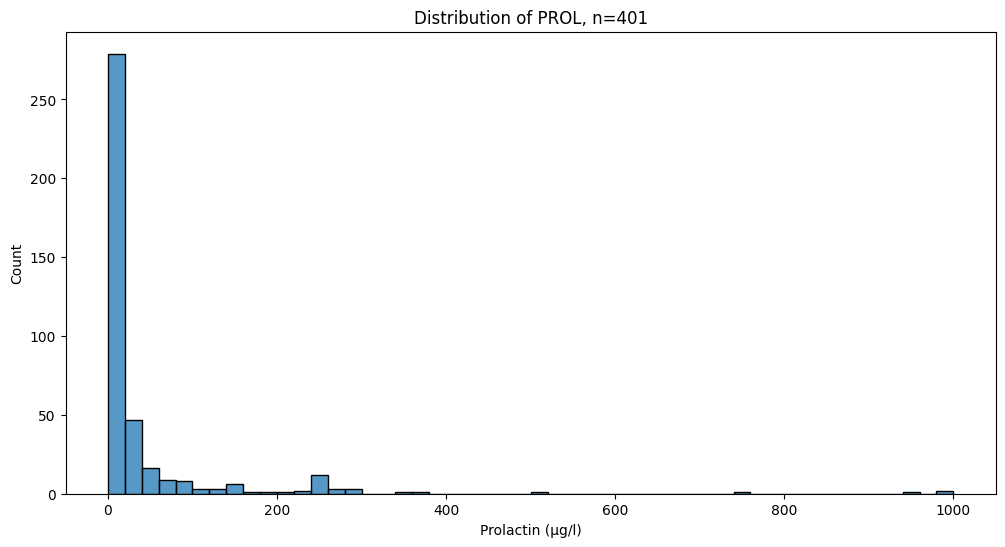

In [140]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('Prolactin (μg/l)')
plt.show()

In [141]:
print("Range of Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

Range of Prolactin for 'prolaktinom': 0.2 to 1000.0
Mean Prolactin for 'prolaktinom': 106.76641025641024
Median Prolactin for 'prolaktinom': 27.9
Missing values for 'prolaktinom': 0


Range of Prolactin for 'non-prolaktinom': 0.2 to 292.9
Mean Prolactin for 'non-prolaktinom': 30.66372902845349
Median Prolactin for 'non-prolaktinom': 10.3
Missing values for 'non-prolaktinom': 0


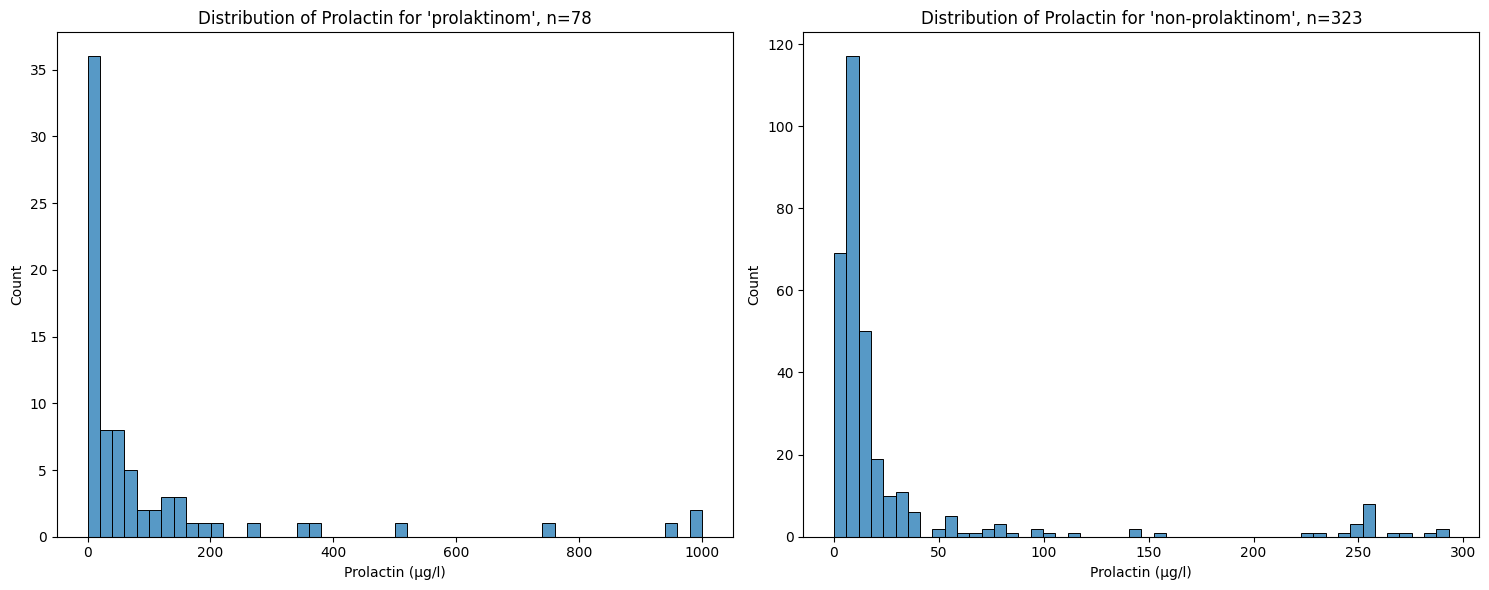

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Subplot for one label
sns.histplot(df[df[label_col] == 'prolaktinom'][column], bins=50, ax=axes[0])
axes[0].set_title(f"Distribution of Prolactin for 'prolaktinom', n={len(df[df[label_col] == 'prolaktinom'][column])}")
axes[0].set_xlabel('Prolactin (μg/l)')

# Subplot for the other label
sns.histplot(df[df[label_col] == 'non-prolaktinom'][column], bins=50, ax=axes[1])
axes[1].set_title(f"Distribution of Prolactin for 'non-prolaktinom', n={len(df[df[label_col] == 'non-prolaktinom'][column])}")
axes[1].set_xlabel('Prolactin (μg/l)')
plt.tight_layout()

# Show the plots
plt.show()


#### Cortisol
The Column 'COR60' contains the measured values of Cortisol for the patient.


In [145]:
column = 'COR60'
print("Range of Cortisol:", df[column].min(), "to", df[column].max())
print("Mean Cortisol:", df[column].mean())
print("Median Cortisol:", df[column].median())
print("Missing values Cortisol:", sum(df[column].isna()))

Range of Cortisol: 110.0 to 1380.0
Mean Cortisol: 513.4688279301746
Median Cortisol: 500.0
Missing values Cortisol: 0


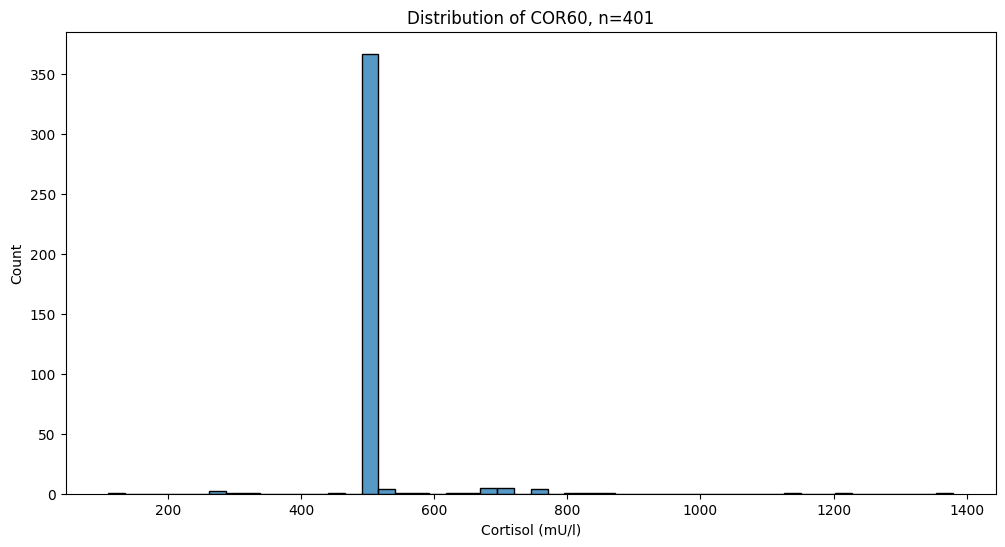

In [146]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('Cortisol (mU/l)')
plt.show()

In [147]:
print("Range of Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values Cortisol for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values Cortisol for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

Range of Cortisol for 'prolaktinom': 452.0 to 1380.0
Mean Cortisol for 'prolaktinom': 533.974358974359
Median Cortisol for 'prolaktinom': 500.0
Missing values Cortisol for 'prolaktinom': 0


Range of Cortisol for 'non-prolaktinom': 110.0 to 1150.0
Mean Cortisol for 'non-prolaktinom': 508.5170278637771
Median Cortisol for 'non-prolaktinom': 500.0
Missing values Cortisol for 'non-prolaktinom': 0


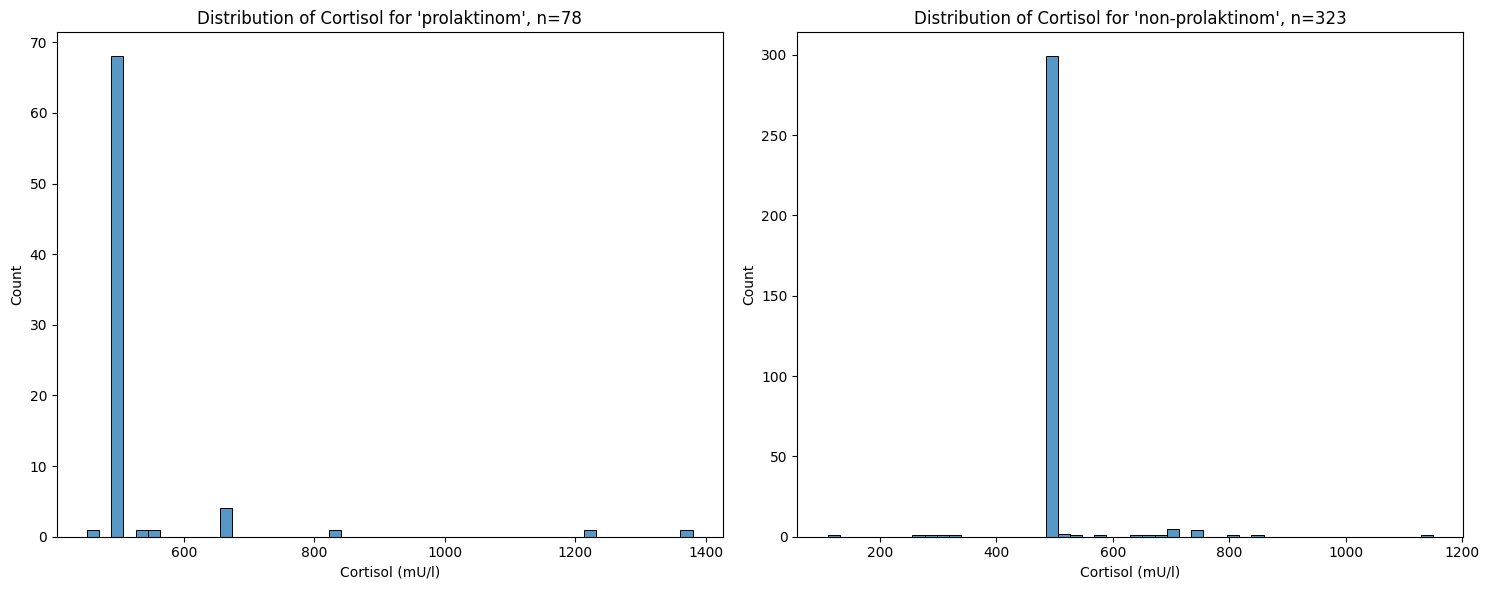

In [148]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Subplot for one label
sns.histplot(df[df[label_col] == 'prolaktinom'][column], bins=50, ax=axes[0])
axes[0].set_title(f"Distribution of Cortisol for 'prolaktinom', n={len(df[df[label_col] == 'prolaktinom'][column])}")
axes[0].set_xlabel('Cortisol (mU/l)')

# Subplot for the other label
sns.histplot(df[df[label_col] == 'non-prolaktinom'][column], bins=50, ax=axes[1])
axes[1].set_title(f"Distribution of Cortisol for 'non-prolaktinom', n={len(df[df[label_col] == 'non-prolaktinom'][column])}")
axes[1].set_xlabel('Cortisol (mU/l)')
plt.tight_layout()

# Show the plots
plt.show()


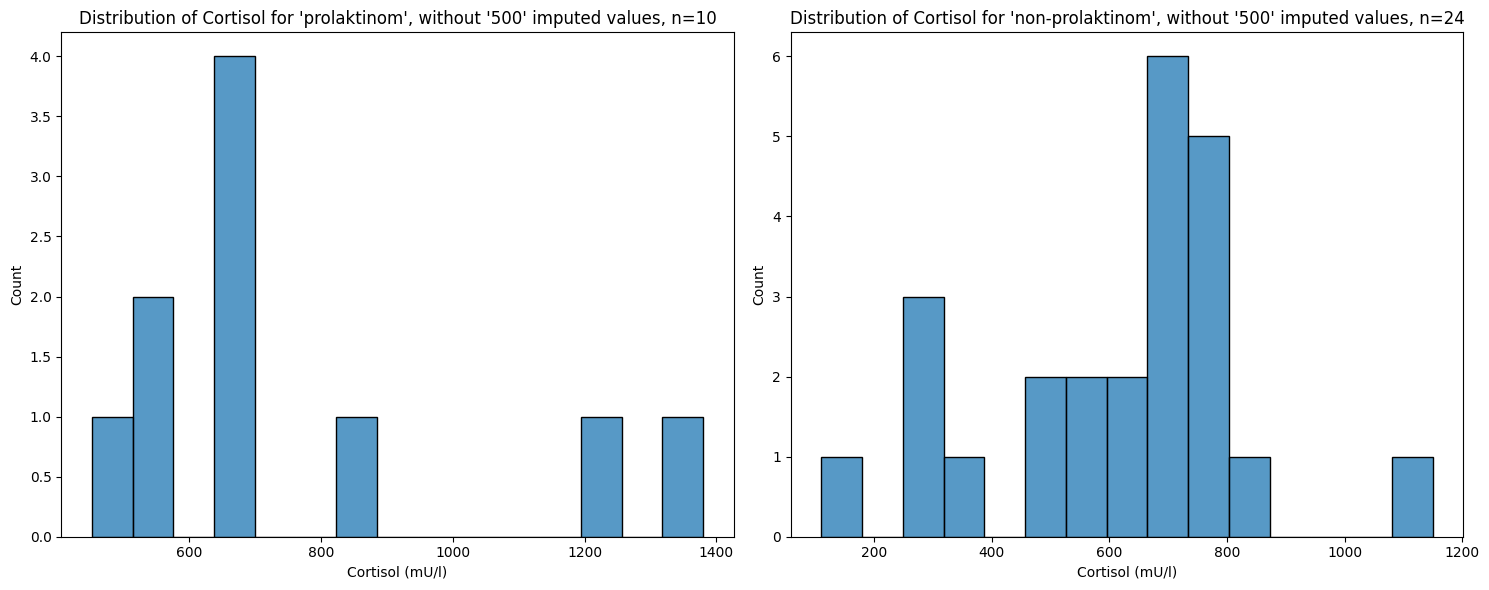

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Subplot for one label
sns.histplot(df[(df[label_col] == 'prolaktinom') & (df[column] != 500.0)][column], bins=15, ax=axes[0])
axes[0].set_title(f"Distribution of Cortisol for 'prolaktinom', without '500' imputed values, n={len(df[(df[label_col] == 'prolaktinom') & (df[column] != 500.0)][column])}")
axes[0].set_xlabel('Cortisol (mU/l)')

# Subplot for the other label
sns.histplot(df[(df[label_col] == 'non-prolaktinom') & (df[column] != 500.0)][column], bins=15, ax=axes[1])
axes[1].set_title(f"Distribution of Cortisol for 'non-prolaktinom', without '500' imputed values, n={len(df[(df[label_col] == 'non-prolaktinom') & (df[column] != 500.0)][column])}")
axes[1].set_xlabel('Cortisol (mU/l)')
plt.tight_layout()

# Show the plots
plt.show()


#### IGF1 (hormone)
The Column 'IGF1' contains the measured values of Insulin-like growth factor 1 for the patient.


In [169]:
column = 'IGF1'
print("Range of IGF1:", df[column].min(), "to", df[column].max())
print("Mean IGF1:", df[column].mean())
print("Median IGF1:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of IGF1: 2.37 to 119.0
Mean IGF1: 18.627349958437243
Median IGF1: 16.899
Missing values: 0


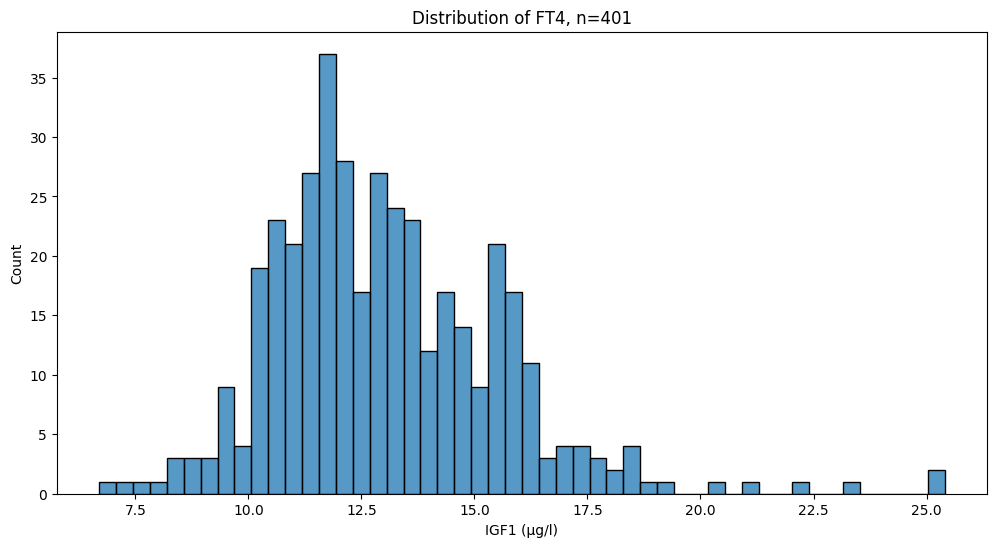

In [177]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('IGF1 (μg/l)')
plt.show()

In [171]:
print("Range of IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values IGF1 for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values IGF1 for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

Range of IGF1 for 'prolaktinom': 7.5 to 44.0
Mean IGF1 for 'prolaktinom': 19.328262820512826
Median IGF1 for 'prolaktinom': 19.294
Missing values IGF1 for 'prolaktinom': 0


Range of IGF1 for 'non-prolaktinom': 2.37 to 119.0
Mean IGF1 for 'non-prolaktinom': 18.458089267285864
Median IGF1 for 'non-prolaktinom': 15.9
Missing values IGF1 for 'non-prolaktinom': 0


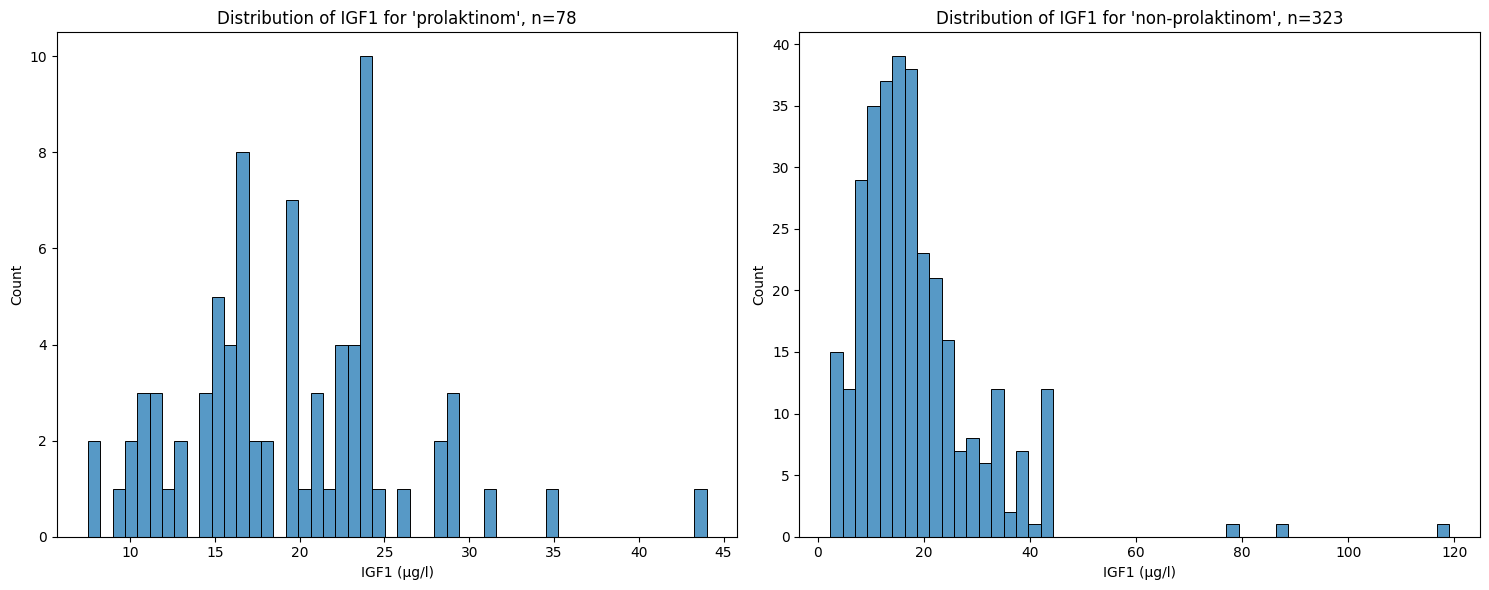

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Subplot for one label
sns.histplot(df[df[label_col] == 'prolaktinom'][column], bins=50, ax=axes[0])
axes[0].set_title(f"Distribution of IGF1 for 'prolaktinom', n={len(df[df[label_col] == 'prolaktinom'][column])}")
axes[0].set_xlabel('IGF1 (μg/l)')

# Subplot for the other label
sns.histplot(df[df[label_col] == 'non-prolaktinom'][column], bins=50, ax=axes[1])
axes[1].set_title(f"Distribution of IGF1 for 'non-prolaktinom', n={len(df[df[label_col] == 'non-prolaktinom'][column])}")
axes[1].set_xlabel('IGF1 (μg/l)')
plt.tight_layout()

# Show the plots
plt.show()


#### FT4 (hormone)
The Column 'FT4' contains the measured values of Insulin-like growth factor 1 for the patient.


In [181]:
column = 'FT4'
print("Range of FT4:", df[column].min(), "to", df[column].max())
print("Mean FT4:", df[column].mean())
print("Median FT4:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of FT4: 6.7 to 25.4
Mean FT4: 13.041376134663343
Median FT4: 12.7
Missing values: 0


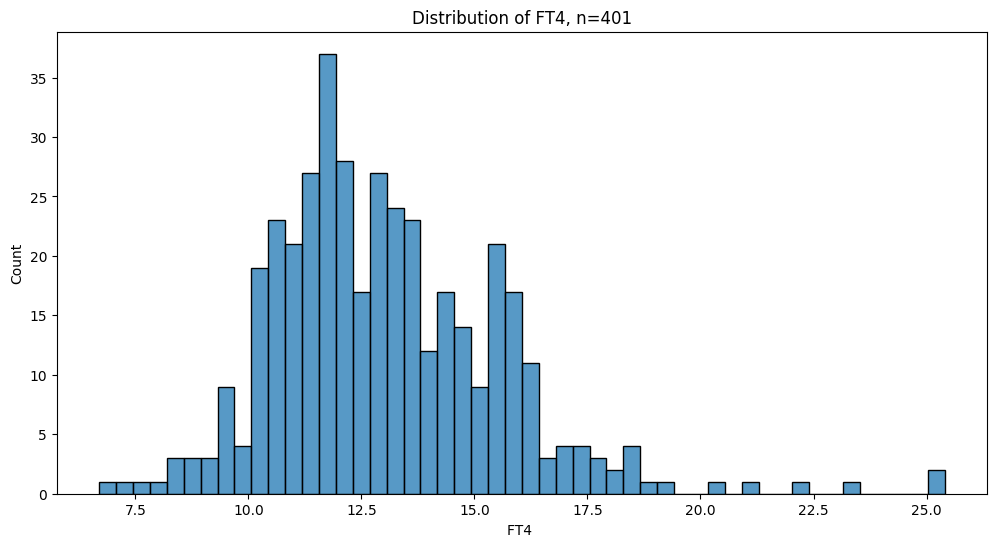

In [182]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('FT4 ')
plt.show()

In [183]:
print("Range of FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values FT4 for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values FT4 for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

Range of FT4 for 'prolaktinom': 9.48 to 18.8
Mean FT4 for 'prolaktinom': 13.103774230769233
Median FT4 for 'prolaktinom': 12.4
Missing values FT4 for 'prolaktinom': 0


Range of FT4 for 'non-prolaktinom': 6.7 to 25.4
Mean FT4 for 'non-prolaktinom': 13.02630786377709
Median FT4 for 'non-prolaktinom': 12.7
Missing values FT4 for 'non-prolaktinom': 0


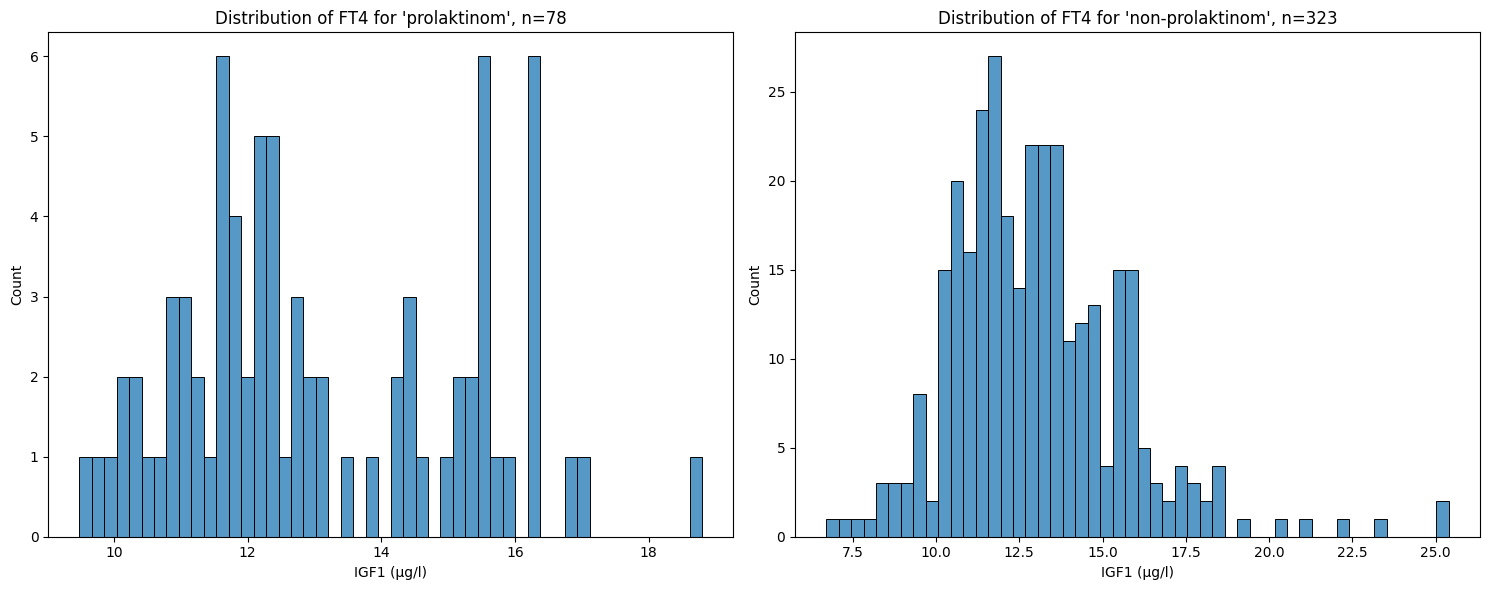

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Subplot for one label
sns.histplot(df[df[label_col] == 'prolaktinom'][column], bins=50, ax=axes[0])
axes[0].set_title(f"Distribution of FT4 for 'prolaktinom', n={len(df[df[label_col] == 'prolaktinom'][column])}")
axes[0].set_xlabel('IGF1 (μg/l)')

# Subplot for the other label
sns.histplot(df[df[label_col] == 'non-prolaktinom'][column], bins=50, ax=axes[1])
axes[1].set_title(f"Distribution of FT4 for 'non-prolaktinom', n={len(df[df[label_col] == 'non-prolaktinom'][column])}")
axes[1].set_xlabel('IGF1 (μg/l)')
plt.tight_layout()

# Show the plots
plt.show()


#### Testosteron (hormone)
The Column 'Testosteron' contains the measured values of Insulin-like growth factor 1 for the patient.


In [185]:
#TODO: weitere filter analysen
column = 'TEST'
print("Range of TEST:", df[column].min(), "to", df[column].max())
print("Mean TEST:", df[column].mean())
print("Median TEST:", df[column].median())
print("Missing values:", sum(df[column].isna()))

Range of TEST: 0.15 to 43.7
Mean TEST: 11.897552752733548
Median TEST: 11.684807692307691
Missing values: 0


In [ ]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('TEST ')
plt.show()

#### LH (hormone)
The Column 'LH' contains the measured values of Luteinizing Hormone for the patient.


In [ ]:
column = 'LH'
print("Range of LH:", df[column].min(), "to", df[column].max())
print("Mean LH:", df[column].mean())
print("Median LH:", df[column].median())
print("Missing values:", sum(df[column].isna()))

In [ ]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('LH')
plt.show()

#### FSH (hormone)
The Column 'FSH' contains the measured values of Follicle-stimulating hormone  for the patient.


In [ ]:
column = 'FSH'
print("Range of FSH:", df[column].min(), "to", df[column].max())
print("Mean FSH:", df[column].mean())
print("Median FSH:", df[column].median())
print("Missing values:", sum(df[column].isna()))

In [ ]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of {column}")
plt.xlabel('FSH')
plt.show()

### Data Labels (Medical diagnosis data)

#### Category Prolactinoma (binary Label)
The Column 'Category' contains the actual label data if a adenoma is a prolactinoma or a non-prolactinoma.


In [ ]:
column= 'Category'
print("Summary Statistics:\n",df[column].describe())
print("Percentage Distribution:\n",df[column].value_counts(normalize=True) * 100)
print("Missing values Adenoma category:", sum(df[column].isna()))

In [ ]:
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma Categorie (binary Label for classification)")
plt.xlabel('Category of Adenoma')
plt.show()

## Correlation with positive prolactinoma diagnosis

##

In [ ]:
# factorise all features and then correlate them to each other
df_patients_corr = df[['Category','Adenoma_size','PROL', 'IGF1','TEST','FSH','LH','FT4']+pre_op_columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) 
correlation_matrix = df_patients_corr.iloc[:,0:1]

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features to the Adenoma Category")
plt.xticks(rotation=45)
plt.show()
# TODO ist sicherlich spannend. Trotzdem müssten wahrscheinlich Plots gemacht werden mit Verteillungen der Werte gegenüber der Kategorie
# Ansonsten werden nur lineare Zusammenhänge ersichtlich (was offensichtlich nicht der Fall ist...)

## MRI per Patient

In [ ]:
summary = df.groupby('Patient_ID')['Patient_ID'].count().sort_values(ascending=False)
#TODO: maybe more eda needed
# Was ist von interesse? -> reichen weitere Bilder?

In [ ]:
sns.stripplot(y=summary, jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=summary, width=0.3)
plt.title("Scatterplot with Boxplot for MRI count per Patient")
plt.ylabel("MRI count per Patient")
plt.show()

In [ ]:
# TODO ganz im Allgemeinen sollten die Plots wahrscheinlich noch interpretiert werden (weiss nicht, ob Dani das möchte...)
# Könnten auch die Hauptinterpretationen im Paper machen... (Vorschlag an D. und S.)